In [1]:
# !pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv("./2019-2023가계동향조사 - 복사본.csv",encoding="utf-8")

df = pd.DataFrame(data)
df

,Unnamed: 0,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,...,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드
0,0,201900,1,2.0,1.0,0.0,0.0,2.0,2.0,64.0,...,0.0,99416.0,0.0,15190.0,0.0,0.0,4893.0,50000.0,29333.0,1.0
1,1,201900,2,1.0,3.0,2.0,0.0,1.0,1.0,63.0,...,3333.0,316357.0,37697.0,0.0,0.0,110160.0,0.0,142500.0,26000.0,1.0
2,2,201900,3,2.0,1.0,0.0,0.0,3.0,1.0,58.0,...,0.0,9206.0,0.0,0.0,4050.0,3728.0,0.0,0.0,1429.0,1.0
3,3,201900,4,1.0,3.0,2.0,0.0,1.0,1.0,29.0,...,0.0,445731.0,71766.0,0.0,245393.0,104001.0,4857.0,7143.0,12571.0,1.0
4,4,201900,5,1.0,1.0,1.0,0.0,3.0,2.0,58.0,...,525514.0,359537.0,13844.0,0.0,65571.0,50121.0,0.0,57143.0,172857.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26859,5227,202100,5228,1.0,1.0,1.0,0.0,3.0,1.0,41.0,...,104997.0,1287783.0,135430.0,280965.0,357560.0,151970.0,184358.0,66667.0,110833.0,1.0
26860,5228,202100,5229,1.0,3.0,1.0,0.0,1.0,1.0,37.0,...,89136.0,3027608.0,1015780.0,632996.0,325370.0,421722.0,423940.0,190000.0,17800.0,1.0
26861,5229,202100,5230,1.0,4.0,1.0,0.0,1.0,1.0,43.0,...,208447.0,4348202.0,1202990.0,1039633.0,235800.0,332810.0,140000.0,350000.0,1046969.0,1.0
26862,5230,202100,5231,1.0,2.0,2.0,0.0,1.0,1.0,36.0,...,25000.0,3940932.0,2510415.0,0.0,635570.0,573595.0,8812.0,52500.0,160040.0,1.0


In [4]:
#열 변수 변경

df.rename(columns={
    '가계지출금액': '전체소비지출',
    '가계지출_소비지출금액': '소비지출',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비': '식료품_곡물구입',
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비': '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비': '식료품_빵떡류구입',
    '가계지출_소비지출_식료품비주류음료_육류구입비': '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비': '식료품_육류가공품구입',
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비': '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비': '식료품_염건수산동물구입',
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비': '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비': '식료품_유제품알구입',
    '가계지출_소비지출_식료품비주류음료_유지류구입비': '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비': '식료품_과일가공품구입',
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비': '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비': '식료품_해조가공품구입',
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비': '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비': '식료품_조미식품구입',
    '가계지출_소비지출_식료품비주류음료_기타식품구입비': '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비': '식료품_커피차구입',
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비': '식료품_쥬스음료구입',

    '가계지출_소비지출_주류담배구입비': '주류담배구입',
    '가계지출_소비지출_주류담배_주류구입비': '주류구입',
    '가계지출_소비지출_주류담배_담배구입비': '담배구입',

    '가계지출_소비지출_의류신발구입비': '의류신발구입',
    '가계지출_소비지출_의류신발_직물및외의구입비': '의류신발_직물및외의구입',
    '가계지출_소비지출_의류신발_내의구입비': '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비': '의류신발_기타의복구입',
    '가계지출_소비지출_의류신발_의복관련서비스구입비': '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비': '의류신발_신발구입',
    '가계지출_소비지출_의류신발_신발서비스구입비': '의류신발_신발서비스구입',

    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비': '주거수도광열_실제주거비구입',
    '가계지출_소비지출_주거수도광열_주택유지수선구입비': '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비': '주거수도광열_상하수도폐기물처리',
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비': '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비': '주거수도광열_연료비구입',

    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비': '가정용품가사서비스_가구조명구입',
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비': '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액': '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비': '가정용품가사서비스_가정용섬유구입',
    '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비': '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액': '가정용품가사서비스_가전관련서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가사용품구입비': '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비': '가정용품가사서비스_가정용공구기타구입',
    '가계지출_소비지출_가정용품가사서비스_가사소모품구입비': '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액': '가정용품가사서비스_가사서비스',

    '가계지출_소비지출_보건제품구입비': '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비': '보건_의약품구입',
    '가계지출_소비지출_보건_의료용소모품구입비': '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비': '보건_보건의료용품기구구입',
    '가계지출_소비지출_보건_외래의료서비스이용금액': '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액': '보건_치과서비스이용',
    '가계지출_소비지출_보건_기타의료서비스이용금액': '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액': '보건_입원서비스이용',

    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_교통_자동차구입비': '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비': '교통_기타운송기구구입',
    '가계지출_소비지출_교통_운송기구유지수리비': '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비': '교통_운송기구연료',
    '가계지출_소비지출_교통_기타개인교통서비스이용금액': '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액': '교통_철도운송',
    '가계지출_소비지출_교통_육상운송금액': '교통_육상운송',
    '가계지출_소비지출_교통_기타운송금액': '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액': '교통_기타교통관련서비스이용',

    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_통신_우편서비스이용금액': '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비': '통신_통신장비구입',
    '가계지출_소비지출_통신_통신서비스이용금액': '통신_통신서비스이용',

    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비': '오락문화_영상음향기기구입',
    '가계지출_소비지출_오락문화_사진광학장비구입비': '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비': '오락문화_정보처리장치구입',
    '가계지출_소비지출_오락문화_기록매체구입비': '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비': '오락문화_영상음향정보기기수리',
    '가계지출_소비지출_오락문화_내구재구입비': '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비': '오락문화_악기기구구입',
    '가계지출_소비지출_오락문화_오락문화내구재유지수리비': '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비': '오락문화_장난감취미용품구입',
    '가계지출_소비지출_오락문화_캠핑운동관련용품구입비': '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비': '오락문화_화훼관련용품구입',
    '가계지출_소비지출_오락문화_애완동물관련물품구입비': '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액': '애완동물_서비스이용',
    '가계지출_소비지출_오락문화_운동오락서비스이용금액': '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액': '문화_서비스이용',
    '가계지출_소비지출_오락문화_복권구입비': '복권_구입비',
    '가계지출_소비지출_오락문화_서적구입비': '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비': '인쇄물_구입비',
    '가계지출_소비지출_오락문화_문구구입비': '문구_구입비',
    '가계지출_소비지출_오락문화_단체여행경비': '단체여행_경비'

},inplace=True)

In [5]:
df.rename(columns={
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_교육_정규교육비': '정규교육비',
    '가계지출_소비지출_교육_초등교육비': '초등교육비',
    '가계지출_소비지출_교육_중등교육비': '중등교육비',
    '가계지출_소비지출_교육_고등교육비': '고등교육비',
    '가계지출_소비지출_교육_학원보습교육비': '학원보습교육비',
    '가계지출_소비지출_교육_학생학원교육비': '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비': '성인학원비',
    '가계지출_소비지출_교육_기타교육비': '기타교육비',

    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_음식숙박_식대': '식대',
    '가계지출_소비지출_음식숙박_숙박비': '숙박비',

    '가계지출_소비지출_기타상품서비스이용금액' : '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액': '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비': '이미용기기구입',
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비': '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비': '시계장신구구입',
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비': '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액': '복지시설비용',
    '가계지출_소비지출_기타상품서비스_보험료': '보험료',
    '가계지출_소비지출_기타상품서비스_기타금융구입비': '기타금융구입',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비' : '기타서비스금액구입',


    '가계지출_비소비지출금액': '비소비지출금액',
    '가계지출_비소비지출_경상조세': '경상조세',
    '가계지출_비소비지출_비경상조세': '비경상조세',
    '가계지출_비소비지출_연금기여금': '연금기여금',
    '가계지출_비소비지출_사회보장구입비': '사회보장구입비',
    '가계지출_비소비지출_이자비용': '이자비용',
    '가계지출_비소비지출_가구간이전지출금액': '가구간이전지출금액',
    '가계지출_비소비지출_비영리단체이전지출금액': '비영리단체이전지출금액'
},inplace=True)
# 행 전처리

data = df[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


In [6]:
# 행 전처리

data = df[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


In [7]:
#성별 값 전처리
df['가구주_성별코드'] = df['가구주_성별코드'].replace({1:'M', 2:'F'})
gender = df['가구주_성별코드']
pd.DataFrame(gender)

,가구주_성별코드
0,F
1,M
2,M
3,M
4,F
...,...
26859,M
26860,M
26861,M
26862,M


In [8]:
#배우자코드 값변경 1,2,3 --> 있음,있음(비동거), 없음
df['배우자코드'] = df['배우자코드'].replace({1: '있음(동거)', 2 : '있음(비동거)', 3: '없음'})

#가구구분코드 1,2 --> 근로자가구, 근로자외 가구
df['가구구분코드'] = df['가구구분코드'].replace({1: '근로자가구', 2 : '근로자외가구'})

#노인가구여부 0,1 --> 아님. 해당
df['노인가구여부'] = df['노인가구여부'].replace({0: '아님', 1 : '해당'})

#가구주_취업여부 (1:'취업', 2:'비취업')
df['가구주_취업여부'] = df['가구주_취업여부'].replace({1:'취업', 2:'비취업'})

#거처구분코드 :
#(1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타')
df['거처구분코드'] = df['거처구분코드'].replace({1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타'})

#입주형태코드 (1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세')
df['입주형태코드'] = df['입주형태코드'].replace({1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세'})

#소득구간코드 :
#(1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상')
df['소득구간코드'] = df['소득구간코드'].replace({1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상'})


In [9]:
age_10 = df[(df["가구주_연령"] >= 10) & (df["가구주_연령"] < 20)]["가구주_연령"]

df.drop(age_10, axis=0, inplace=True)

In [10]:
expend = df.copy()
expend

,Unnamed: 0,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,...,기타서비스금액구입,비소비지출금액,경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드
0,0,201900,1,근로자외가구,1.0,0.0,아님,있음(비동거),F,64.0,...,0.0,99416.0,0.0,15190.0,0.0,0.0,4893.0,50000.0,29333.0,1.0
1,1,201900,2,근로자가구,3.0,2.0,아님,있음(동거),M,63.0,...,3333.0,316357.0,37697.0,0.0,0.0,110160.0,0.0,142500.0,26000.0,1.0
2,2,201900,3,근로자외가구,1.0,0.0,아님,없음,M,58.0,...,0.0,9206.0,0.0,0.0,4050.0,3728.0,0.0,0.0,1429.0,1.0
3,3,201900,4,근로자가구,3.0,2.0,아님,있음(동거),M,29.0,...,0.0,445731.0,71766.0,0.0,245393.0,104001.0,4857.0,7143.0,12571.0,1.0
4,4,201900,5,근로자가구,1.0,1.0,아님,없음,F,58.0,...,525514.0,359537.0,13844.0,0.0,65571.0,50121.0,0.0,57143.0,172857.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26859,5227,202100,5228,근로자가구,1.0,1.0,아님,없음,M,41.0,...,104997.0,1287783.0,135430.0,280965.0,357560.0,151970.0,184358.0,66667.0,110833.0,1.0
26860,5228,202100,5229,근로자가구,3.0,1.0,아님,있음(동거),M,37.0,...,89136.0,3027608.0,1015780.0,632996.0,325370.0,421722.0,423940.0,190000.0,17800.0,1.0
26861,5229,202100,5230,근로자가구,4.0,1.0,아님,있음(동거),M,43.0,...,208447.0,4348202.0,1202990.0,1039633.0,235800.0,332810.0,140000.0,350000.0,1046969.0,1.0
26862,5230,202100,5231,근로자가구,2.0,2.0,아님,있음(동거),M,36.0,...,25000.0,3940932.0,2510415.0,0.0,635570.0,573595.0,8812.0,52500.0,160040.0,1.0


In [20]:
df = df[["소비지출",'식료품음료구입','주류담배구입',
        '의류신발구입','주거수도광열비','교육비','음식숙박비','가정용품가사서비스이용',
        '보건제품구입','교통비','통신비','오락문화비', '기타상품서비스이용']]
df

,소비지출,식료품음료구입,주류담배구입,의류신발구입,주거수도광열비,교육비,음식숙박비,가정용품가사서비스이용,보건제품구입,교통비,통신비,오락문화비,기타상품서비스이용
0,451464.0,153011.0,1142.0,21833.0,79220.0,0.0,40642.0,8013.0,16733.0,31550.0,36850.0,4818.0,57652.0
1,1468101.0,300713.0,800.0,45300.0,302318.0,17200.0,152167.0,26840.0,139575.0,123183.0,89476.0,46501.0,224028.0
2,1358773.0,171247.0,1594.0,86571.0,506276.0,0.0,108943.0,35007.0,66304.0,34700.0,63129.0,262869.0,22133.0
3,1166942.0,155088.0,4429.0,35060.0,117620.0,34786.0,268471.0,12674.0,39010.0,169601.0,143110.0,70786.0,116307.0
4,5875488.0,311939.0,55529.0,367754.0,368676.0,0.0,216033.0,2808527.0,272351.0,73970.0,63276.0,448777.0,888656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26859,982151.0,66410.0,0.0,0.0,140378.0,0.0,258400.0,8683.0,11317.0,237077.0,14869.0,85006.0,160012.0
26860,2624472.0,555311.0,54758.0,191069.0,171582.0,8000.0,571300.0,45771.0,124818.0,229380.0,98708.0,220410.0,353366.0
26861,5707507.0,1034740.0,997.0,347427.0,237723.0,1697467.0,721967.0,99738.0,140527.0,412267.0,142282.0,293315.0,579057.0
26862,3503013.0,632030.0,239750.0,161480.0,306600.0,500000.0,679615.0,55630.0,171720.0,282750.0,146946.0,129330.0,197163.0


In [21]:
#df.cov()



In [22]:
df.corr(method='pearson')

,소비지출,식료품음료구입,주류담배구입,의류신발구입,주거수도광열비,교육비,음식숙박비,가정용품가사서비스이용,보건제품구입,교통비,통신비,오락문화비,기타상품서비스이용
소비지출,1.000000,0.463879,0.132466,0.493520,0.371755,0.455198,0.562191,0.434689,0.327167,0.657441,0.377067,0.467286,0.483732
식료품음료구입,0.463879,1.000000,0.059976,0.322644,0.077570,0.278836,0.283775,0.175081,0.213702,0.093802,0.235310,0.203375,0.260801
주류담배구입,0.132466,0.059976,1.000000,0.052983,0.027271,0.016151,0.237222,0.021258,0.002831,0.039390,0.120959,0.054074,0.053333
의류신발구입,0.493520,0.322644,0.052983,1.000000,0.084086,0.277643,0.452986,0.176036,0.142477,0.118196,0.263778,0.303932,0.329154
주거수도광열비,0.371755,0.077570,0.027271,0.084086,1.000000,0.070774,0.104842,0.222437,0.019983,0.047145,0.077827,0.105670,0.109751
교육비,0.455198,0.278836,0.016151,0.277643,0.070774,1.000000,0.338332,0.090965,0.057409,0.083829,0.240761,0.219334,0.159816
음식숙박비,0.562191,0.283775,0.237222,0.452986,0.104842,0.338332,1.000000,0.153978,0.098920,0.163146,0.360979,0.340867,0.324130
가정용품가사서비스이용,0.434689,0.175081,0.021258,0.176036,0.222437,0.090965,0.153978,1.000000,0.102453,0.066224,0.106813,0.246242,0.215718
보건제품구입,0.327167,0.213702,0.002831,0.142477,0.019983,0.057409,0.098920,0.102453,1.000000,0.049091,0.072203,0.080919,0.143814
교통비,0.657441,0.093802,0.039390,0.118196,0.047145,0.083829,0.163146,0.066224,0.049091,1.000000,0.106179,0.094981,0.109017


In [23]:
%matplotlib inline
import koreanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

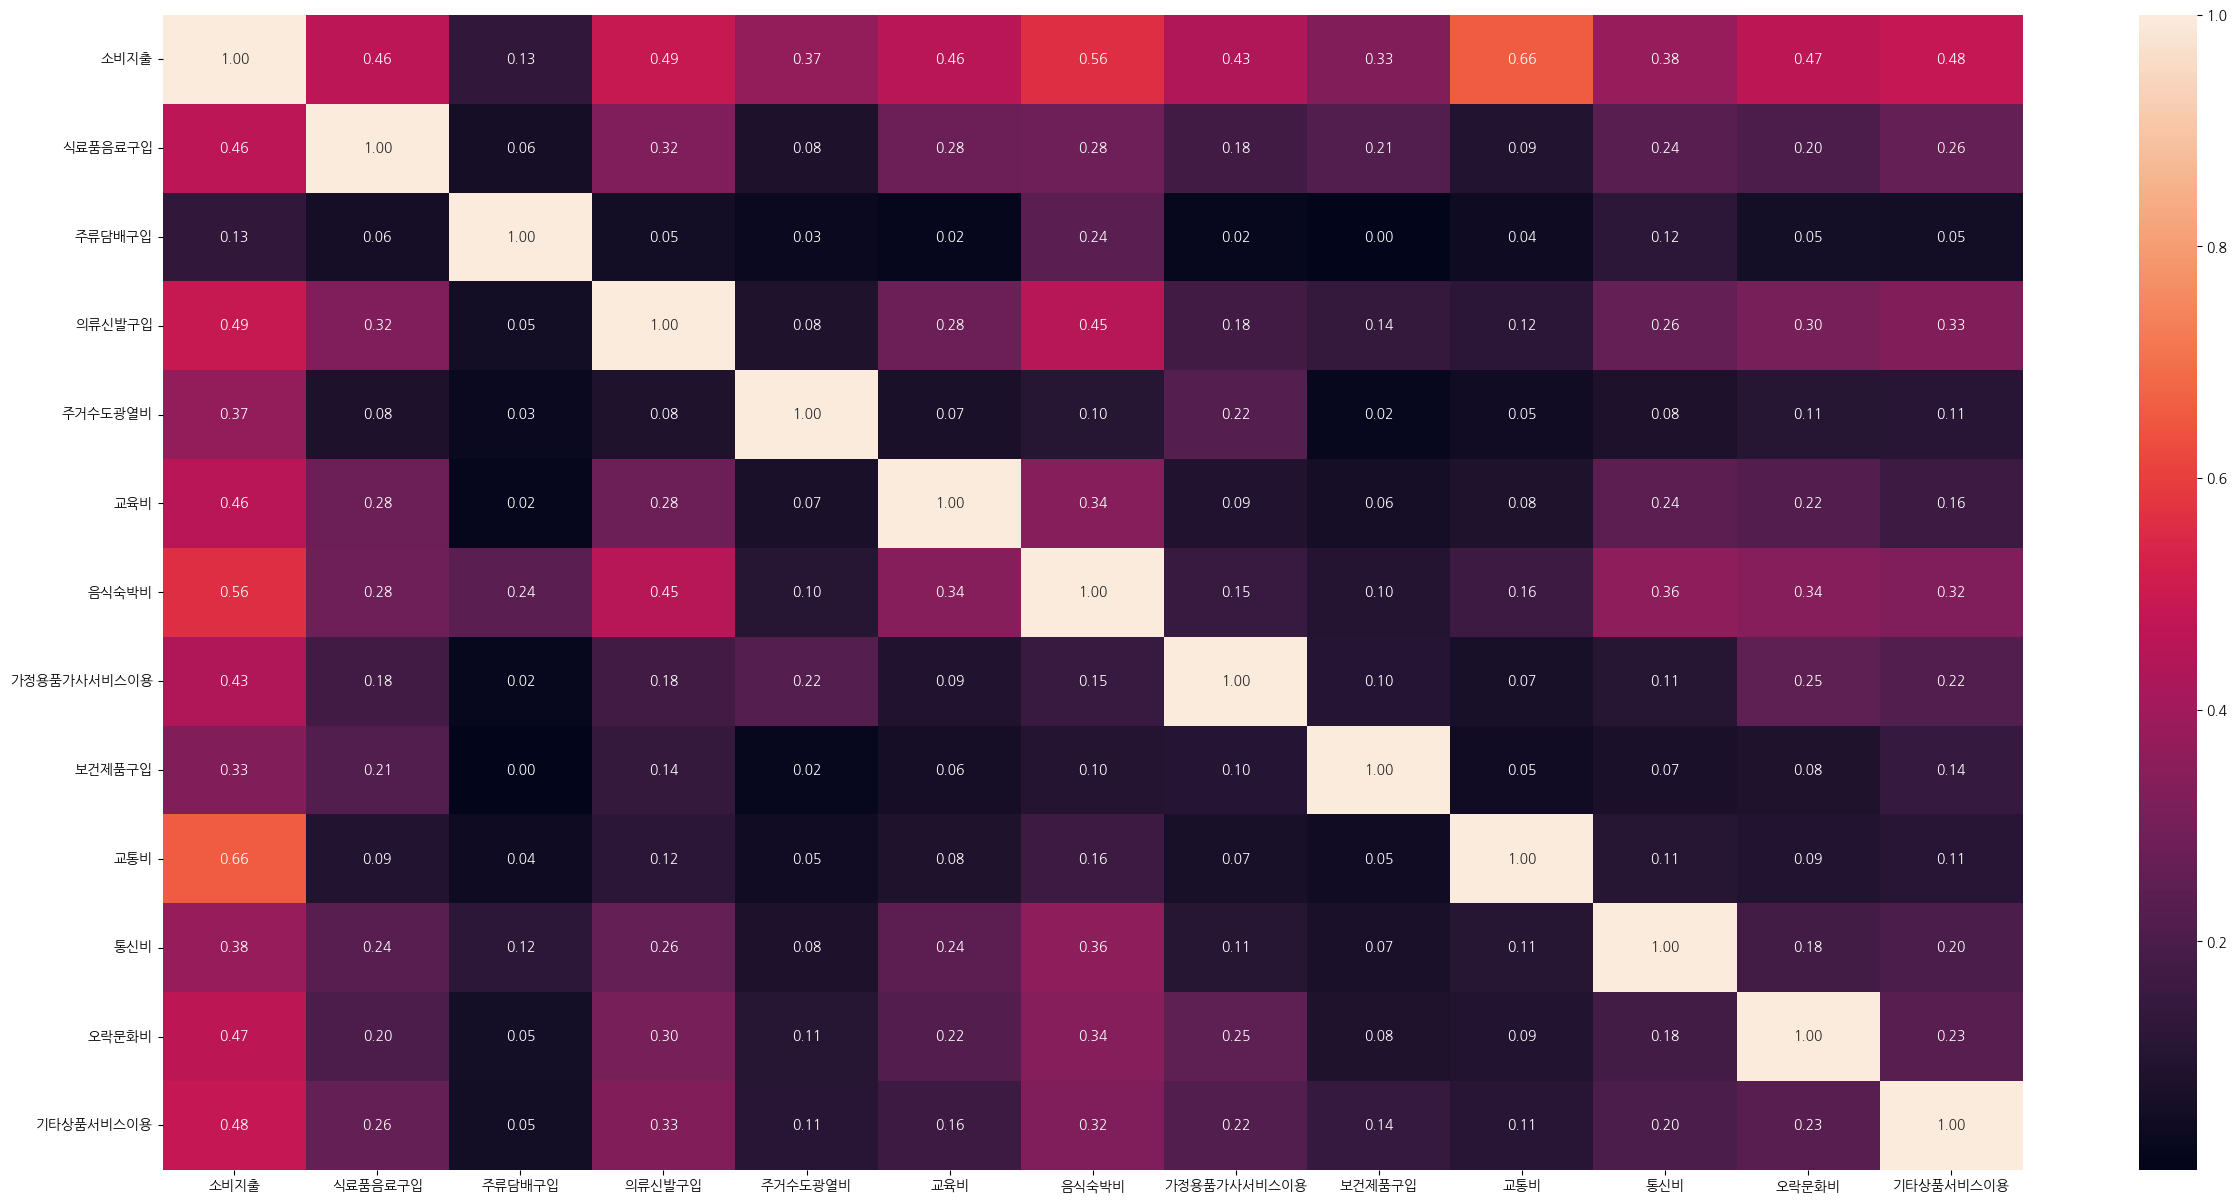

In [24]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt='0.2f')

In [25]:
single_expend = expend[expend['가구원수']==1][["소비지출",'식료품음료구입','주류담배구입',
        '의류신발구입','주거수도광열비','교육비','음식숙박비','가정용품가사서비스이용',
        '보건제품구입','교통비','통신비','오락문화비', '기타상품서비스이용']]

In [17]:
#single_expend.cov()

In [26]:
single_expend.corr()


,소비지출,식료품음료구입,주류담배구입,의류신발구입,주거수도광열비,교육비,음식숙박비,가정용품가사서비스이용,보건제품구입,교통비,통신비,오락문화비,기타상품서비스이용
소비지출,1.000000,0.133665,0.152824,0.363389,0.320345,0.161688,0.428726,0.319515,0.253917,0.747110,0.317229,0.389887,0.399794
식료품음료구입,0.133665,1.000000,-0.085785,0.080413,-0.017825,-0.004927,-0.133183,0.091063,0.154483,-0.020423,-0.060008,0.004719,0.097667
주류담배구입,0.152824,-0.085785,1.000000,0.025522,0.075696,0.013128,0.316202,0.003194,-0.060129,0.049144,0.133174,0.037657,0.021644
의류신발구입,0.363389,0.080413,0.025522,1.000000,0.076252,0.089963,0.332748,0.117677,0.072643,0.066895,0.178260,0.155803,0.300294
주거수도광열비,0.320345,-0.017825,0.075696,0.076252,1.000000,0.058276,0.155841,0.080498,-0.029541,0.030522,0.116990,0.051493,0.050182
교육비,0.161688,-0.004927,0.013128,0.089963,0.058276,1.000000,0.119919,-0.001033,-0.015649,0.013177,0.069521,0.049618,0.056252
음식숙박비,0.428726,-0.133183,0.316202,0.332748,0.155841,0.119919,1.000000,0.056028,-0.040895,0.117544,0.289336,0.191849,0.217961
가정용품가사서비스이용,0.319515,0.091063,0.003194,0.117677,0.080498,-0.001033,0.056028,1.000000,0.075116,0.019947,0.046154,0.158659,0.151988
보건제품구입,0.253917,0.154483,-0.060129,0.072643,-0.029541,-0.015649,-0.040895,0.075116,1.000000,0.016753,-0.003860,0.003859,0.125925
교통비,0.747110,-0.020423,0.049144,0.066895,0.030522,0.013177,0.117544,0.019947,0.016753,1.000000,0.155280,0.038999,0.087148


<Axes: >

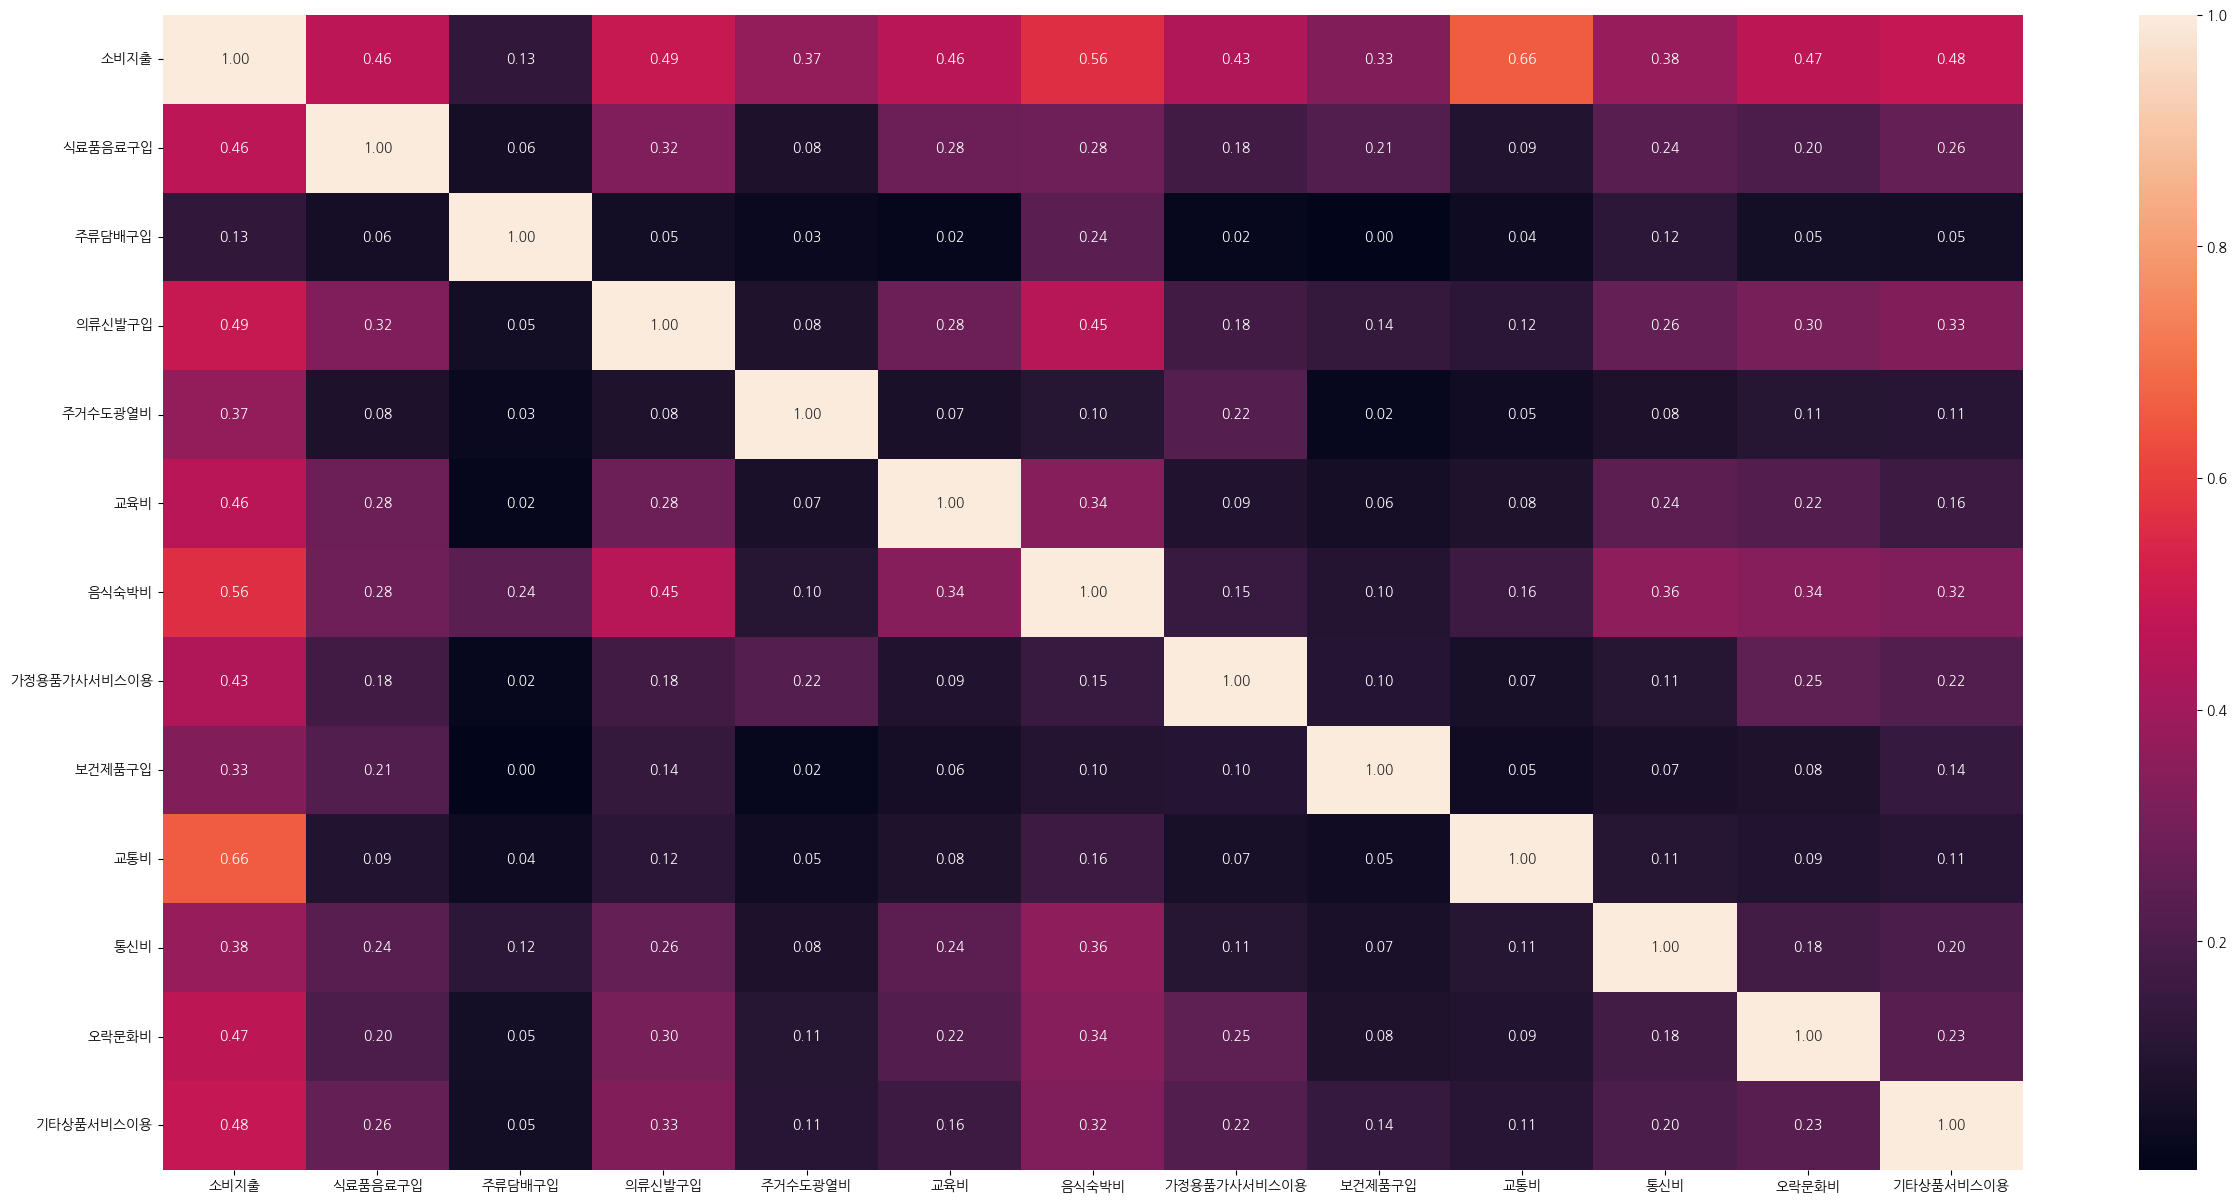

In [27]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt='0.2f')